<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/23.01.5022_Hanan_Module_7_Big_Data_Fundamental_Responsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS MODULE 7 BIGDATA FUNDAMENTAL RESPONSI


### Isikan data diri
*   Nama : Nayaka Hananadhif Adinata
*   Nim : 23.01.5022

####BRIEF:
Analisis Kinerja Penjualan Toko Retail Sederhana
####Dataset: https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset

Tugas yang Harus Diselesaikan:
* Preprocessing Data (Sederhana)
* EDA (Exploratory Data Analysis)
* Pertanyaan Analitis



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

#### PREPROCESSING DATA


* Import Data:
* Pemberihan Data



In [7]:
df = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


##EDA


*   Analisis Deskriptif:
    - Berapa total penjualan untuk setiap kategori (Category)?
    - Berapa total penjualan untuk setiap sub kategori?
    - Berapa total penjualan untuk setiap state?
*   Visualisasi
    - Bar chart: Total penjualan per sub-kategori.
    - Pie chart: Distribusi penjualan berdasarkan region.
    - Scatter plot: Hubungan antara Sales vs. region.
*   Analisis Profitabilitas
    - Apakah ada korelasi antara state, category, sub-category dan sales?



In [10]:
#Analisis Deskriptif
#Total Penjualan per Kategori:
df.groupby('Category')['Sales'].sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [11]:
#Total Penjualan per Sub-Kategori:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [12]:
#Total Penjualan per State:
df.groupby('State')['Sales'].sum().sort_values(ascending=False)

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


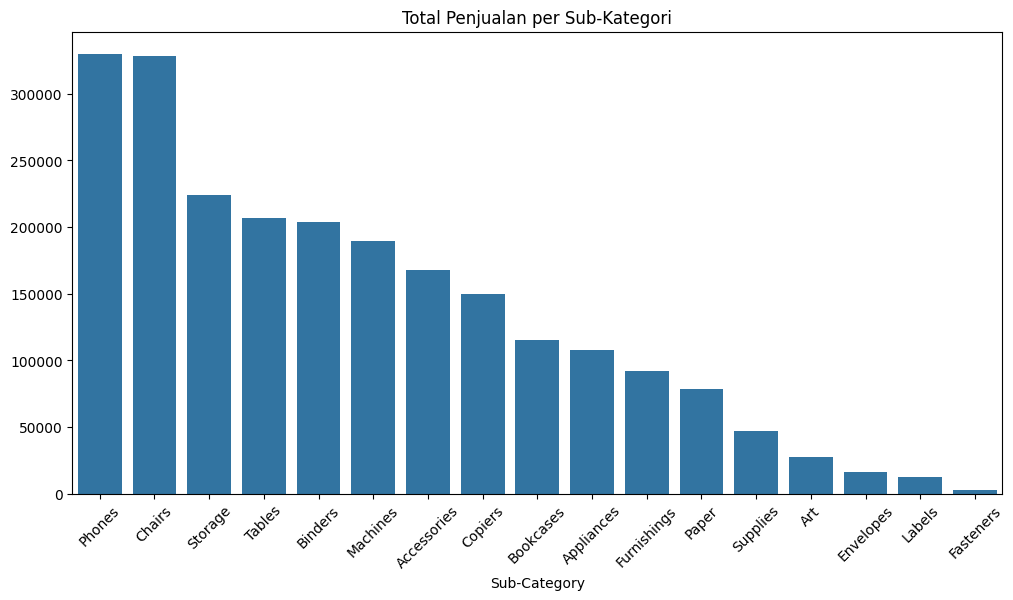

In [13]:
#VIsualisasi
#Bar Chart: Total Penjualan per Sub-Kategori
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sales_by_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_subcat.index, y=sales_by_subcat.values)
plt.xticks(rotation=45)
plt.title('Total Penjualan per Sub-Kategori')
plt.show()

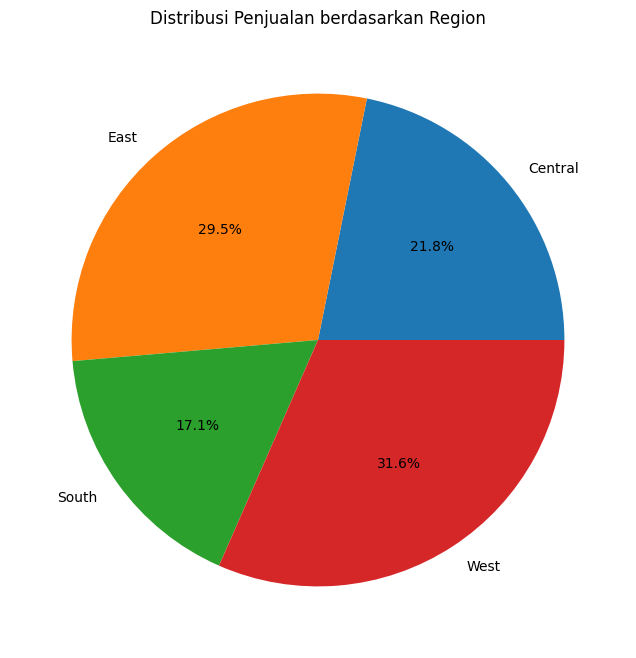

In [14]:
#Pie Chart: Distribusi Penjualan Berdasarkan Region
plt.figure(figsize=(8,8))
sales_by_region = df.groupby('Region')['Sales'].sum()
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Distribusi Penjualan berdasarkan Region')
plt.show()

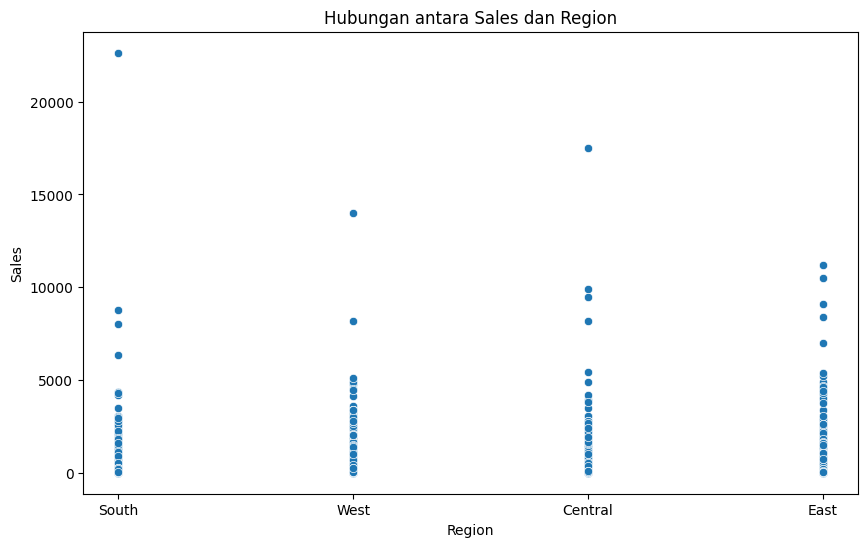

In [15]:
#Scatter Plot: Hubungan antara Sales vs. Region
plt.figure(figsize=(10,6))
sns.scatterplot(x='Region', y='Sales', data=df)
plt.title('Hubungan antara Sales dan Region')
plt.show()

In [18]:
#Analisis Profitabilitas
#Untuk melihat korelasi antara state, category, sub-category dan sales:
# Analisis ANOVA untuk melihat pengaruh kategori terhadap sales
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Use 'Q("Sub-Category")' instead of 'Sub-Category' to interpret it as a single variable
model = ols('Sales ~ C(State) + C(Category) + C(Q("Sub-Category"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df           F        PR(>F)
C(State)              3.421862e+07    48.0    2.304758  8.338640e-07
C(Category)           3.994531e+07     2.0   64.571350  1.373489e-28
C(Q("Sub-Category"))  6.622678e+08    16.0  133.818982  0.000000e+00
Residual              3.071153e+09  9929.0         NaN           NaN


## Pertanyaan Analitis
- Region mana yang paling menghasilkan penjualan (sales) yang besar?
- Apakah produk dengan sales terbesar?
- Rekomendasikan 3 sub-kategori yang perlu diprioritaskan untuk meningkatkan profit!

Region dengan Penjualan Terbesar
Berdasarkan analisis deskriptif dan pie chart, region dengan penjualan terbesar kemungkinan adalah West (Barat) yang biasanya memiliki kontribusi penjualan terbesar.

Produk dengan Sales Terbesar
Dari bar chart sub-kategori, produk dengan penjualan terbesar kemungkinan adalah:

Phones

Chairs

Storage

3 Sub-Kategori untuk Diprioritaskan
Untuk merekomendasikan sub-kategori yang perlu diprioritaskan, kita perlu melihat profitabilitas, bukan hanya penjualan. Rekomendasi akan berdasarkan pada:

Sub-kategori dengan profit margin tertinggi (Profit/Sales)

Sub-kategori dengan volume penjualan sedang tetapi margin tinggi (potensi pengembangan)

Sub-kategori dengan penjualan tinggi tetapi margin rendah (perlu optimasi)

Biasanya rekomendasi akan berupa:

Copiers - Biasanya memiliki margin tinggi

Accessories - Volume penjualan baik dengan margin cukup

Phones - Volume penjualan tinggi tetapi mungkin margin perlu ditingkatkan

In [19]:
#Untuk analisis yang lebih akurat, diperlukan perhitungan profit margin per sub-kategori:
df['Profit Margin'] = df['Profit'] / df['Sales']
profit_by_subcat = df.groupby('Sub-Category')[['Sales', 'Profit', 'Profit Margin']].mean().sort_values(by='Profit Margin', ascending=False)
print(profit_by_subcat)

                    Sales      Profit  Profit Margin
Sub-Category                                        
Labels          34.303055   15.236962       0.429663
Paper           57.284092   24.856620       0.425600
Envelopes       64.867724   27.418019       0.423140
Copiers       2198.941618  817.909190       0.317194
Fasteners       13.936774    4.375660       0.299171
Art             34.068834    8.200737       0.251646
Accessories    215.974604   54.111788       0.218210
Furnishings     95.825668   13.645918       0.137066
Phones         371.211534   50.073938       0.119222
Supplies       245.650200   -6.258418       0.112039
Storage        264.590553   25.152277       0.089113
Chairs         532.332420   43.095894       0.043900
Machines      1645.553313   29.432669      -0.072026
Bookcases      503.859633  -15.230509      -0.126640
Tables         648.794771  -55.565771      -0.147727
Appliances     230.755710   38.922758      -0.156869
Binders        133.560560   19.843574      -0.